In [438]:
# Import stuffs
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [439]:
df = pd.read_csv("gapminder.csv")
df = df.dropna(how="all")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


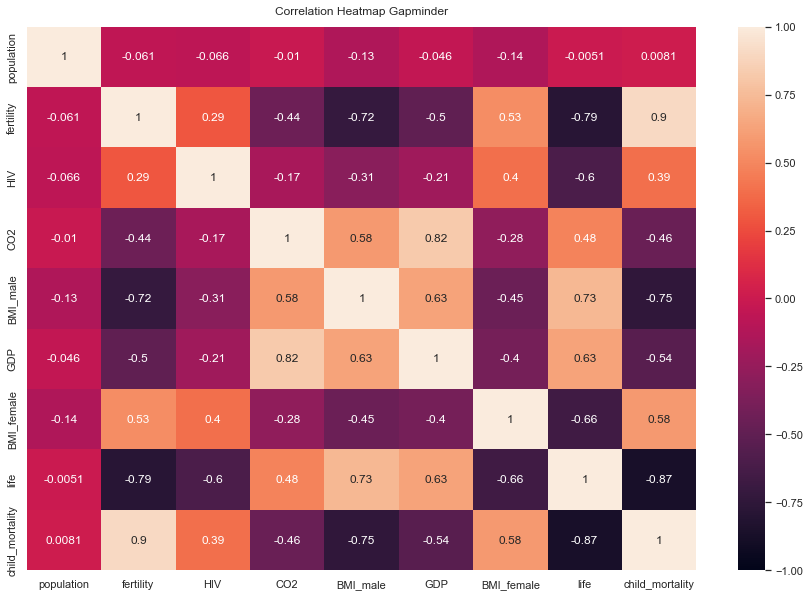

In [440]:
# use seaborn to visualize data of Gapminder

plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title("Correlation Heatmap Gapminder", fontdict={"fontsize":12}, pad=12);

In [441]:
# Apply linear regression with the fertility to predict life expectewncy

x = df["fertility"]
y = df["life"]

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

0.6192442167740035


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_40968/3167880737.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_40968/3167880737.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:, None], y))


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_40968/2745783487.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x, y, "bo", x, regression.predict(x[:, None]), "-k")


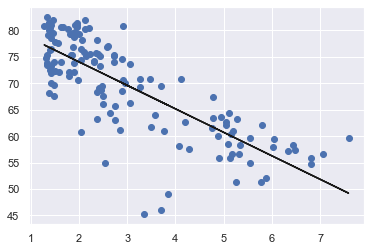

In [442]:
fig, ax = plt.plot(x, y, "bo", x, regression.predict(x[:, None]), "-k")

In [443]:
cross_val_score_1 = cross_val_score(regression, x[:, None], y, cv=5)
cross_val_score_1

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_40968/2867262317.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cross_val_score_1 = cross_val_score(regression, x[:, None], y, cv=5)


array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

In [444]:
X = df[["population","fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
Y = df["life"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# regression.fit(X, y)
# print(regression.score(X, y))
# # fig, ax = plt.plot(X, y, "bo", X, regression.predict(X), "-k")
# regression.predict(X)
print(x_test.shape)
print(y_test.shape)

(28, 8)
(28,)


In [445]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [446]:
print("coefficient: ", regression.coef_)

coefficient:  [-1.60855400e-09 -4.23498390e-01 -5.97545234e-01 -2.06092387e-01
  4.26187991e-01  1.36033783e-04 -2.25235861e-01 -9.28088363e-02]


In [447]:
print("Intercept: ", regression.intercept_)

Intercept:  92.91911146403578


In [448]:
Y_pred = regression.predict(x_test)
Y_pred

array([74.78815858, 67.50570125, 46.87412045, 74.7269611 , 74.05727176,
       46.23650628, 73.70552885, 65.3411502 , 76.79997579, 62.18695493,
       84.27340688, 80.78958233, 63.60126283, 75.93373608, 69.65808501,
       76.25520053, 75.77194576, 62.07901882, 67.95963468, 72.50008948,
       63.42297438, 72.8413384 , 78.18399733, 74.33522631, 64.51392134,
       65.27672225, 52.97962309, 71.00072462])

In [449]:
regression.score(X_test, Y_test)

0.9254222614066604

In [450]:
# regression score when using 1 feature: 0.6192442167740035
# regression score when using all features: 0.832215934328857
# --> using all features make regression more accurate

In [451]:
# 5-fold cross-validation
cross_val_score_2 = cross_val_score(regression, X_test, Y_test, cv=5)

In [452]:
print('Regression accuracy for fertifility feature: ',cross_val_score_1)
print('Regression accuracy for all features: ',cross_val_score_2)

Regression accuracy for fertifility feature:  [0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Regression accuracy for all features:  [0.57370507 0.46424864 0.60807562 0.92197508 0.88933865]


In [453]:
# results are all over the place (no consistency), there's nothing to say